# Basic use of Function_from_Expression

The module `function_from_expression` defines a class `Function_from_Expression` to handle functions which are defined by `sympy`-expressions.

It is useful, to import this as

`
from function_from_expression import Function_from_Expression as FE
`

It is not necessary to use `Function_from_Expression` at al. This class is a simple wrapper to make live easier if you need to define functions from expressions.

In [1]:
from sympy import *
init_printing()

from fun_expr import Function_from_Expression as FE

To define a function from an expression, i.e.

$$
  f(x) = x^2
$$

you need a variable ($x$), which must be as `symbol`. The right hand side of the given
definition of a function ($x^2$) is the expression.

In [2]:
# define the variable of the function
x = Symbol('x')

# define the function
f = FE(x, x**2)

# show the result
f

`str(f)` shows that $f$ essentially is an object of type `Lambda` which is a `sympy`-generalisation of `lambda`

In [3]:
str(f)

'Lambda(x, x**2)'

The `type` of instances of `FE` is

In [4]:
type(f)

fun_expr.function_from_expression.Function_from_Expression

`f` can be applied to an argument:

In [5]:
f(2)

The argument can be a more complicated `sympy` expression

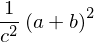

In [6]:
a,b,c = symbols('a,b,c')
expr = (a+b)/c

f(expr)

The function can be plotted:

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # for OSX

import numpy as np

The simplest way to plot a function using `matplotlib` is to use sympys `plot`-command. This works since $f(x)$ is an expression.

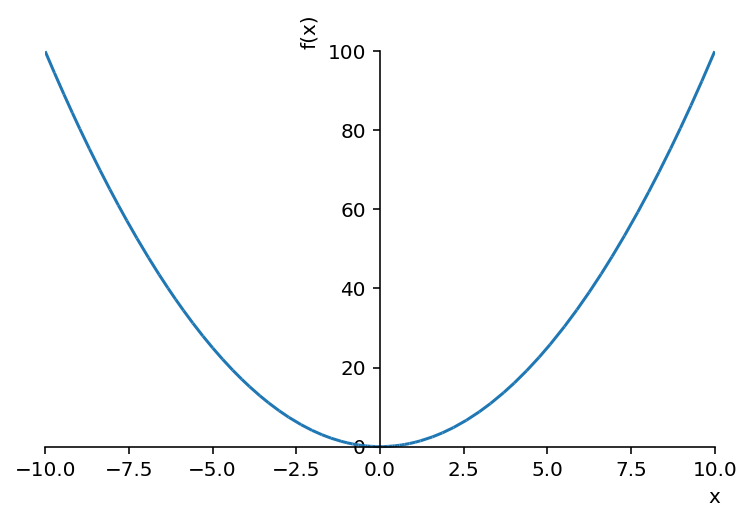

In [8]:
plot(f(x))

Often it is desireable to have more control:

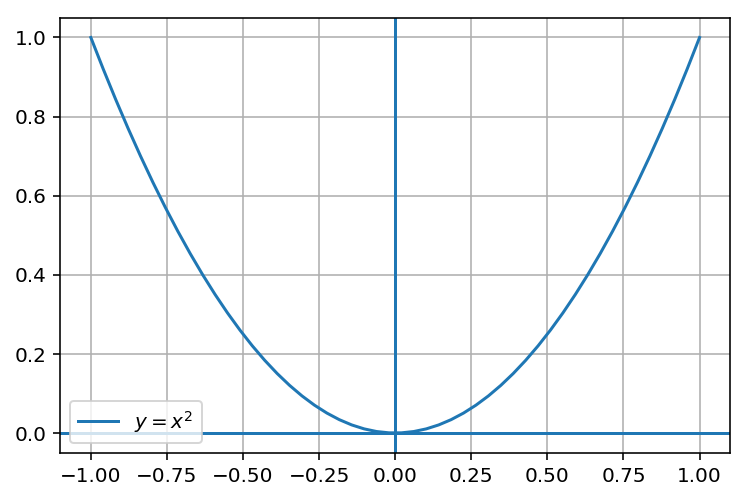

In [9]:
# define new plot
fig, ax = plt.subplots()

# the x-values of the plot
lx = np.linspace(-1,1)

# the y-values of the plot
ax.plot(lx,f.lambdified(lx),label=r'$y={f}$'.format(f=latex(f(x))))

# additional commands
ax.grid(True)
ax.axhline(0)
ax.axvline(0)
ax.legend(loc='best')

It is possible, to differentiate the function. If `f` is a function of a single variable `x`, this is simply

In [10]:
f_1 = f.diff()
f_1

Differentiation can be more specific:

In [11]:
f_1 = f.diff(x)
f_1

The second derivative of `f` w.r.t. `x` is

In [12]:
f_2 = f.diff(x,2)
f_2

If a function `f` is differentiated w.r.t. a variable, the result is a function of the same varibles as `f`. Sometimes, an expression is needed as the result of a differentiation. In this cases, the flag `as_function=False` can be used

In [13]:
f.diff(x, as_function=False)

Another possibility is to use the expr of a function

In [14]:
f.diff(x).expr

The function can be integrated:

In [15]:
f.integrate()

In [16]:
# or
f.integrate(x)

It is possible to integrate oven an interval $[a,b]$:

In [17]:
f.integrate((x,2,4))

The integral of a function is an expression. If the integral is needed as a function, the flag
`as_function=True` can be used

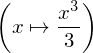

In [18]:
f.integrate(x, as_function=True)

It is possible, to define functions of several variables (not every symbol needs to be a variable)

In [19]:
x,y,z = symbols('x,y,z')
f = FE((x,y), x*y*z)
f

In the above case, `z` is a free symbol of `f`

In [20]:
f.free_symbols

In [21]:
f.atoms()

In [22]:
f.variables

In [23]:
f.expr

Free symbols can be substituted by other values:

In [24]:
f.subs(z,3)